In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import os

In [ ]:
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/наборы данных/')

___________________________________________________________________________

**загрузка модуля pingouin:**

In [ ]:
!pip install pingouin

     |████████████████████████████████| 183 kB 8.5 MB/s 
     |████████████████████████████████| 38.1 MB 240 kB/s 
     |████████████████████████████████| 9.8 MB 44.6 MB/s 
  Created wheel for pingouin: filename=pingouin-0.5.1-py3-none-any.whl size=194002 sha256=e16f49e33c087cc8227609a3243b31f7a88c1d66ebb8af6df33953119f998483
  Stored in directory: /root/.cache/pip/wheels/74/a7/b6/5b5f03b0395fdada1f45d3aed76e7da48873a02805545ef652
  Created wheel for littleutils: filename=littleutils-0.2.2-py3-none-any.whl size=7048 sha256=1485a9080fd2bf1a689adaea5097ab55496fac119a6ac357731f543059721727
  Stored in directory: /root/.cache/pip/wheels/d6/64/cd/32819b511a488e4993f2fab909a95330289c3f4e0f6ef4676d
Successfully built pingouin littleutils
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsm

In [ ]:
exit() #!!!

**exit()** - это перезапустит среду выполнения без удаления файлов **и pingouin пойдет**. Время выполнения начнется автоматически. И если вы нажмете «Run all», запуск не прерывается и работает до конца.

______________________________________________________________

In [ ]:
from pandas import read_csv
from pandas import set_option
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import pandas as pd

_______________________________________________________

# **ГОТОВЫЕ ДЛЯ МОДЕЛИ ДАНННЫЕ**

In [ ]:
filename='seeds_dataset.txt'
names=['area A','perimeter P','compactness','length of ker',
       'width of ker', 'asymmetry coeff', 'length of ker groove','class']
df=read_csv(filename,sep='\t', error_bad_lines=False,names=names)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df=df.rename(columns=lambda x: x.replace(' ','_'))

In [ ]:
df['class_name']=np.where(df['class']==1,'Кама',(np.where(df['class']==2,'Роза','Канадская')))

In [ ]:
df.class_name = df.class_name.astype('category')

In [ ]:
set_option('display.width',100) # задается ширина экрана с выводом
set_option('precision',2)       # задается количество знаков после запятой

In [ ]:
df.dtypes

area_A                   float64
perimeter_P              float64
compactness              float64
length_of_ker            float64
width_of_ker             float64
asymmetry_coeff          float64
length_of_ker_groove     float64
class                      int64
class_name              category
dtype: object

In [ ]:
df.sample(4)

,area_A,perimeter_P,compactness,length_of_ker,width_of_ker,asymmetry_coeff,length_of_ker_groove,class,class_name
2,14.29,14.09,0.91,5.29,3.34,2.70,4.83,1,Кама
63,13.22,13.84,0.87,5.39,3.07,4.16,5.09,1,Кама
96,19.31,16.59,0.88,6.34,3.81,3.48,6.24,2,Роза
172,11.27,12.97,0.84,5.09,2.76,4.31,5.00,3,Канадская


______________________________________________________________

# **СМОТРИМ ВЫБРОСЫ**

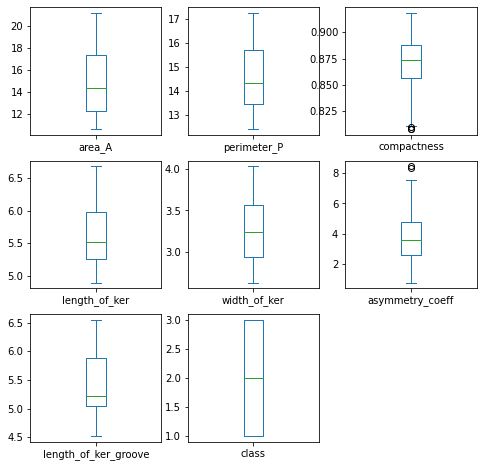

In [ ]:
df.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(8,8))
plt.show()
# ящик с усами 2 вершины не ловит

_____________________________________________________________________

# **ЗАГРУЗКА НЕОБХОДИМЫХ МОДУЛЕЙ ДЛЯ ЛИНЕЙНЫХ МОДЕЛЕЙ КЛАССИФИКАЦИИ**

**загрузка модуля pingouin:**

**exit()** - это перезапустит среду выполнения без удаления файлов **и pingouin пойдет**. Время выполнения начнется автоматически. И если вы нажмете «Run all», запуск не прерывается и работает до конца.

In [ ]:
exit() #!!!

In [ ]:
import os
import numpy as np
import pandas as pd
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
import pingouin as pg

_________________________________________________________________________

# **ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ**

In [ ]:
df.sample(4)

,area_A,perimeter_P,compactness,length_of_ker,width_of_ker,asymmetry_coeff,length_of_ker_groove,class,class_name
171,11.55,13.10,0.85,5.17,2.85,6.71,4.96,3,Канадская
33,13.94,14.17,0.87,5.58,3.15,2.12,5.01,1,Кама
163,12.55,13.57,0.86,5.33,2.97,4.42,5.18,3,Канадская
76,17.32,15.91,0.86,6.06,3.40,3.82,5.92,2,Роза


In [ ]:
array = df.iloc[:,:8].values
array

array([[15.26  , 14.84  ,  0.871 , ...,  2.221 ,  5.22  ,  1.    ],
       [14.88  , 14.57  ,  0.8811, ...,  1.018 ,  4.956 ,  1.    ],
       [14.29  , 14.09  ,  0.905 , ...,  2.699 ,  4.825 ,  1.    ],
       ...,
       [13.2   , 13.66  ,  0.8883, ...,  8.315 ,  5.056 ,  3.    ],
       [11.84  , 13.21  ,  0.8521, ...,  3.598 ,  5.044 ,  3.    ],
       [12.3   , 13.34  ,  0.8684, ...,  5.637 ,  5.063 ,  3.    ]])

In [ ]:
X = array[:,0:7] # факторные признаки, т.е. параметры объекта
Y = array[:,7] # результативные признак, т.е. сам объект
# это обучение с учителем х - это данные, y - это ответ

In [ ]:
X

array([[15.26  , 14.84  ,  0.871 , ...,  3.312 ,  2.221 ,  5.22  ],
       [14.88  , 14.57  ,  0.8811, ...,  3.333 ,  1.018 ,  4.956 ],
       [14.29  , 14.09  ,  0.905 , ...,  3.337 ,  2.699 ,  4.825 ],
       ...,
       [13.2   , 13.66  ,  0.8883, ...,  3.232 ,  8.315 ,  5.056 ],
       [11.84  , 13.21  ,  0.8521, ...,  2.836 ,  3.598 ,  5.044 ],
       [12.3   , 13.34  ,  0.8684, ...,  2.974 ,  5.637 ,  5.063 ]])

In [ ]:
Y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3.])

**5. Задайте разбиение на фолды с помощью функции KFold(n_splits= n_splits, random_state = random_state, shuffle=True) из модуля sklearn.model_selection. Результат запишите в переменную kfold. На вход данной функции подайте следующую информацию: 1) количество частей, на которые должна разбиваться выборка (n_splits), - пусть 10; 2) счетчик случайных чисел (random_state) – пусть 7; 3) необходимость перемешивания данных выборки при каждой оценке, задав параметр shuffle=True.**

In [ ]:
kfold=KFold(n_splits=10,random_state=7,shuffle=True)

**6. Постройте модель логистической регрессии, воспользовавшись функцией LogisticRegression(solver='liblinear') из модуля sklearn.linear_model. Результат запишите в переменную model.**

In [ ]:
model=LogisticRegression(solver='liblinear')

**7. Проведите кросс-валидацию, воспользовавшись функцией cross_val_score(model, X, Y, cv=kfold) из модуля sklearn.model_selection. Результат запишите в переменную results.**

In [ ]:
results=cross_val_score(model, X, Y, cv=kfold) # cv - это количество раз разбивки данных на обучающий и тестовый наборы,обучение на них, тестирование и вывод обобщенного лучшего варианта

**8. Выведите на экран среднюю долю правильных ответов (accuracy) и стандартное отклонение полученных оценок, воспользовавшись функциями mean() и std() соответственно.**

In [ ]:
results.mean()

0.9285714285714286

In [ ]:
results.std()

0.048795003647426664

**9. Обучите модель на всех данных с помощью функции fit().**

**10. Выведите на экран свободный член и значения коэффициентов регрессии при факторных признаках, которая разделяет классы, обратившись, соответственно, к атрибутам intercept_shape и coef_shape. Запишите математически уравнение регрессии.**

In [ ]:
model.fit(X,Y)

LogisticRegression(solver='liblinear')

In [ ]:
model.intercept_.shape

(3,)

In [ ]:
model.coef_.shape

(3, 7)

In [ ]:
model.intercept_

array([ 0.2499078 , -0.59994468,  0.27914459])

In [ ]:
model.coef_

array([[-0.66128635,  1.77130143,  0.41606293,  0.89480023,  1.2372489 ,
        -0.85183437, -4.35821019],
       [ 2.54208787, -2.49298656, -0.61396081, -1.21143766, -1.16176048,
         0.40631744,  1.35077318],
       [-2.38465529,  1.00942368,  0.20626987,  0.50622472,  0.06365746,
         1.01201964,  1.95259137]])

**11. Произвольно задайте значения факторных признаков для двух новых наблюдений. Поместите их в переменную x_new. Например, np.array([[0,136,42,34,136,43,2,32],[0,137,40,35,168,43.1,2.288,33]]).**

**12. По обученной модели дайте прогноз классов для новых наблюдений, воспользовавшись функцией predict().**


In [ ]:
Y_pred = model.predict(X)
# подставляем наши данные в обученную модель и смотрим что
# исходя из параметров пациенты скорей всего заболеют, т.е.
# их можно отнести к группе риска

In [ ]:
Y_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 2., 1., 1., 1., 1., 1., 1.,
       1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 2., 1., 3., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1.,
       2., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1.,
       1., 3., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 1., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 1., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 1., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 1., 3., 1., 3., 3.,
       3., 3., 3., 3., 3., 3.])

In [ ]:
Y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3.])

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
R2=r2_score(Y, Y_pred)
R2

0.7214285714285714

**вводим конкретные данные:**

In [ ]:
x_new=np.array([[14.88,14.57,0.88,5.55,3.33,1.02,4.96	],[11.23,12.88,0.85,5.14,2.79,4.33,5.00	]])
# это данные 2-х пациентов щас проверим заболеют или нет

In [ ]:
model.predict(x_new) # сюда заносим конкретные данные и смотрим прогноз

array([1., 3.])

**13. По обученной модели дайте прогноз вероятности классов для новых наблюдений, воспользовавшись функцией predict_proba().**

In [ ]:
model.predict_proba(x_new)
# нулевой столбец - это нулевой класс
# первый столбец - это первый класс
# первая строка - это первые данные (здесь с вероятностью 96% относится к 1-ому типу)
# вторая строка = это вторые данные (здесь с вероятностью 83% относится к 3-ему типу)

array([[0.95628385, 0.0423319 , 0.00138425],
       [0.1642972 , 0.00303227, 0.83267053]])

# **ЛОГИСТИЧЕСКАЯ РЕГРЕССИЯ (на стандартизированных данных)**

________________________________________________________________________________

# **НАЧАЛО**
# **стандартизируем, удаляем выбросы:**

1. Масштабируем
2. Стандартизируем
3. Заменяем выбросы на NaN (больше 3-х стандартных отклонений)
4. NaN были заменены на соседнее число **Текст, выделенный полужирным шрифтом**

DataFrame.values Pandas DataFrame.values возвращает Numpy-представление данного DataFrame.
Используйте атрибут DataFrame.values чтобы возвратить пустое представление данного DataFrame.

In [ ]:
X.shape

(210, 7)

**масштабирование:**

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from pandas.core.apply import FrameApply
scaler=MinMaxScaler(feature_range=(0,1))

In [ ]:
rescaledX=scaler.fit_transform(X)
rescaledX

In [ ]:
from numpy import set_printoptions

In [ ]:
set_printoptions(precision=4)

In [ ]:
rescaledX

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler().fit(X) # создаем объект и обучаем

In [ ]:
rescaledX=scaler.transform(X) # преобразуем данные

In [ ]:
rescaledX[:5,:]

In [ ]:
import pandas as pd
fg = pd.DataFrame(rescaledX)
fg.head(15)

In [ ]:
import numpy as np

**цикл который меняет выбросы (значения превышающие 3 стандартных отклонения) на NaN во всех столбцах:**

In [ ]:
for i in fg:
    fg[i] = np.where((fg[i] > 3) | (fg[i] < -3), np.nan, fg[i])
fg.head(15)

In [ ]:
fgY = pd.DataFrame(Y)
fgY.head(5)

In [ ]:
fg['end'] = fgY

In [ ]:
fg.head(5)

In [ ]:
fg_groupby = fg.sort_values(by=['end',3]) # упорядочиваем данные по результирующим признакаам

In [ ]:
fg_groupby.isna().sum()

In [ ]:
fg_groupby['end'].value_counts()

In [ ]:
fg_groupby.head(20)

In [ ]:
fg_groupby = fg_groupby.fillna(method ='pad') # заменяем NaN на предыдущее значение в столбце
# методы Значение параметра метода: {‘pad’, ‘ffill’,‘backfill’, ‘bfill’, None}, default None
#pad/ffill: использование предыдущий Не пропущенное значение, чтобы заполнить пропущенное значение
#backfill/bfill: использование следующий Заполните пропущенное значение не пропущенным значением
#None: Укажите значение для замены отсутствующего значения (по умолчанию это так)

In [ ]:
df

,area_A,perimeter_P,compactness,length_of_ker,width_of_ker,asymmetry_coeff,length_of_ker_groove,class,class_name
0,15.26,14.84,0.87,5.76,3.31,2.22,5.22,1,Кама
1,14.88,14.57,0.88,5.55,3.33,1.02,4.96,1,Кама
2,14.29,14.09,0.91,5.29,3.34,2.70,4.83,1,Кама
3,13.84,13.94,0.90,5.32,3.38,2.26,4.80,1,Кама
4,16.14,14.99,0.90,5.66,3.56,1.35,5.17,1,Кама
...,...,...,...,...,...,...,...,...,...
205,12.19,13.20,0.88,5.14,2.98,3.63,4.87,3,Канадская
206,11.23,12.88,0.85,5.14,2.79,4.33,5.00,3,Канадская
207,13.20,13.66,0.89,5.24,3.23,8.31,5.06,3,Канадская
208,11.84,13.21,0.85,5.17,2.84,3.60,5.04,3,Канадская


In [ ]:
fg_groupby.head(5)

,0,1,2,3,4,5,6,end
0,0.14,2.15e-01,6.06e-05,0.30,0.14,-0.99,-0.38,1.0
1,0.01,8.22e-03,4.29e-01,-0.17,0.20,-1.79,-0.92,1.0
2,-0.19,-3.60e-01,1.44e+00,-0.76,0.21,-0.67,-1.19,1.0
3,-0.35,-4.75e-01,1.04e+00,-0.69,0.32,-0.96,-1.23,1.0
4,0.45,3.31e-01,1.37e+00,0.07,0.81,-1.56,-0.48,1.0


In [ ]:
fg_groupby.isna().sum()

In [ ]:
fg_groupby = fg_groupby.sort_index()

In [ ]:
fg_groupby['end'] = fg_groupby['end'].astype('int')

In [ ]:
fg_groupby.dtypes

0      float64
1      float64
2      float64
3      float64
4      float64
5      float64
6      float64
end      int64
dtype: object

# **КОНЕЦ**
**стандартизации и удаления выбросов**

___________________________________________________________________________

# **Делаем модель на преобразованных данных**

In [ ]:
array = fg_groupby.iloc[:,:].values
array

array([[ 1.4210e-01,  2.1546e-01,  6.0602e-05, ..., -9.8615e-01,
        -3.8358e-01,  1.0000e+00],
       [ 1.1188e-02,  8.2238e-03,  4.2852e-01, ..., -1.7882e+00,
        -9.2201e-01,  1.0000e+00],
       [-1.9207e-01, -3.6020e-01,  1.4424e+00, ..., -6.6748e-01,
        -1.1892e+00,  1.0000e+00],
       ...,
       [-5.6757e-01, -6.9025e-01,  7.3395e-01, ...,  2.8787e-01,
        -7.1806e-01,  3.0000e+00],
       [-1.0361e+00, -1.0356e+00, -8.0170e-01, ..., -6.8135e-02,
        -7.4253e-01,  3.0000e+00],
       [-8.7762e-01, -9.3586e-01, -1.1023e-01, ...,  1.2912e+00,
        -7.0378e-01,  3.0000e+00]])

In [ ]:
X = array[:,0:7] # факторные признаки, т.е. параметры объекта
Y = array[:,7] # результативные признак, т.е. сам объект
# это обучение с учителем х - это данные, y - это ответ

In [ ]:
X

array([[ 1.4210e-01,  2.1546e-01,  6.0602e-05, ...,  1.4170e-01,
        -9.8615e-01, -3.8358e-01],
       [ 1.1188e-02,  8.2238e-03,  4.2852e-01, ...,  1.9743e-01,
        -1.7882e+00, -9.2201e-01],
       [-1.9207e-01, -3.6020e-01,  1.4424e+00, ...,  2.0805e-01,
        -6.6748e-01, -1.1892e+00],
       ...,
       [-5.6757e-01, -6.9025e-01,  7.3395e-01, ..., -7.0604e-02,
         2.8787e-01, -7.1806e-01],
       [-1.0361e+00, -1.0356e+00, -8.0170e-01, ..., -1.1215e+00,
        -6.8135e-02, -7.4253e-01],
       [-8.7762e-01, -9.3586e-01, -1.1023e-01, ..., -7.5529e-01,
         1.2912e+00, -7.0378e-01]])

In [ ]:
Y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3.])

**5. Задайте разбиение на фолды с помощью функции KFold(n_splits= n_splits, random_state = random_state, shuffle=True) из модуля sklearn.model_selection. Результат запишите в переменную kfold. На вход данной функции подайте следующую информацию: 1) количество частей, на которые должна разбиваться выборка (n_splits), - пусть 10; 2) счетчик случайных чисел (random_state) – пусть 7; 3) необходимость перемешивания данных выборки при каждой оценке, задав параметр shuffle=True.**

In [ ]:
kfold=KFold(n_splits=10,random_state=7,shuffle=True)

**6. Постройте модель логистической регрессии, воспользовавшись функцией LogisticRegression(solver='liblinear') из модуля sklearn.linear_model. Результат запишите в переменную model.**

In [ ]:
model=LogisticRegression(solver='liblinear')

**7. Проведите кросс-валидацию, воспользовавшись функцией cross_val_score(model, X, Y, cv=kfold) из модуля sklearn.model_selection. Результат запишите в переменную results.**

In [ ]:
results=cross_val_score(model, X, Y, cv=kfold) # cv - это количество раз разбивки данных на обучающий и тестовый наборы,обучение на них, тестирование и вывод обобщенного лучшего варианта

**8. Выведите на экран среднюю долю правильных ответов (accuracy) и стандартное отклонение полученных оценок, воспользовавшись функциями mean() и std() соответственно.**

In [ ]:
results.mean()

0.9380952380952381

In [ ]:
results.std()

0.0604217978116644

**9. Обучите модель на всех данных с помощью функции fit().**

**10. Выведите на экран свободный член и значения коэффициентов регрессии при факторных признаках, которая разделяет классы, обратившись, соответственно, к атрибутам intercept_shape и coef_shape. Запишите математически уравнение регрессии.**

In [ ]:
model.fit(X,Y)

LogisticRegression(solver='liblinear')

In [ ]:
model.intercept_.shape

(3,)

In [ ]:
model.coef_.shape

(3, 7)

In [ ]:
model.intercept_

array([-1.1665, -1.6525, -2.0542])

In [ ]:
model.coef_

array([[-0.2324,  0.7073,  0.4595,  2.2141, -0.1117, -1.1601, -3.9337],
       [ 1.0697,  1.0903, -0.028 , -0.1881,  0.8726,  0.7695,  2.1911],
       [-1.192 , -1.368 , -0.5525, -1.4315, -0.9061,  1.3031,  1.488 ]])

**11. Произвольно задайте значения факторных признаков для двух новых наблюдений. Поместите их в переменную x_new. Например, np.array([[0,136,42,34,136,43,2,32],[0,137,40,35,168,43.1,2.288,33]]).**

**12. По обученной модели дайте прогноз классов для новых наблюдений, воспользовавшись функцией predict().**


In [ ]:
Y_pred = model.predict(X)
# подставляем наши данные в обученную модель и смотрим что
# исходя из параметров пациенты скорей всего заболеют, т.е.
# их можно отнести к группе риска

In [ ]:
Y_pred

array([1., 1., 1., 1., 1., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 1., 1., 3., 1., 1., 1., 2., 1., 1., 1., 1., 1., 1., 1.,
       1., 3., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 3., 1., 1., 1., 1.,
       1., 3., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 1., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 1., 3., 1., 3., 3.,
       3., 3., 3., 3., 3., 3.])

In [ ]:
Y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3.])

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
R2=r2_score(Y, Y_pred)
R2

0.7428571428571429

# **+: после стандартизации прогноз улучшился на 2 единицы с 0.72 до 0.74**
# **-: не знаю как получить прогноз из исзодныз данных(бкз стандартизации), получается хрень**

**вводим конкретные данные:**

In [ ]:
x_new=np.array([[14.88,14.57,0.88,5.55,3.33,1.02,4.96	],[11.23,12.88,0.85,5.14,2.79,4.33,5.00	]])
# это данные 2-х пациентов щас проверим заболеют или нет

In [ ]:
model.predict(x_new) # сюда заносим конкретные данные и смотрим прогноз

array([2., 2.])

**13. По обученной модели дайте прогноз вероятности классов для новых наблюдений, воспользовавшись функцией predict_proba().**

In [ ]:
model.predict_proba(x_new)
# нулевой столбец - это нулевой класс
# первый столбец - это первый класс
# первая строка - это первые данные (здесь с вероятностью 96% относится к 1-ому типу)
# вторая строка = это вторые данные (здесь с вероятностью 83% относится к 3-ему типу)

array([[5.9672e-02, 9.4033e-01, 3.4078e-19],
       [3.7134e-04, 9.9963e-01, 6.7033e-14]])